In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import numpy as np

In [2]:
digits = datasets.load_digits()
data = digits.images.reshape(len(digits.images), -1)
label = digits.target.reshape(len(digits.images, ))
data.shape

(1797, 64)

In [3]:
import matplotlib.image as mpimg
path = "/home/gasai/github/projects/ml_perseptron"
image = []
for i in range(20):
    image.append(mpimg.imread(path + "/" + str(i + 1) + "percent.png"))
image = np.array(image)
image.shape

(20, 8, 8, 3)

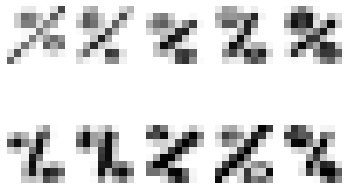

In [4]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.imshow(image[i], cmap=plt.cm.gray_r, interpolation="nearest")

In [5]:
image_gray = [(16 - img[:, :, 0] * 16).astype(int) for img in image]
image_gray = np.array(image_gray)
image_gray.shape

(20, 8, 8)

In [6]:
for i in range(20):
    data = np.append(data, image_gray[i].reshape(1, 64), axis=0)

In [7]:
data.shape

(1817, 64)

In [8]:
percents = np.array(['%' for i in range(20)])
label = np.append(label, percents) 
label.shape

(1817,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.3, random_state=1)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 64) (546, 64) (1271,) (546,)


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=100, alpha=1e-4,solver='sgd', 
                    verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

In [12]:
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 11.95383702
Iteration 2, loss = 1.60108081
Iteration 3, loss = 1.01113244
Iteration 4, loss = 0.73339738
Iteration 5, loss = 0.38473300
Iteration 6, loss = 0.25833112
Iteration 7, loss = 0.19709142
Iteration 8, loss = 0.18681122
Iteration 9, loss = 0.14756633
Iteration 10, loss = 0.13568513
Iteration 11, loss = 0.13539707
Iteration 12, loss = 0.10652051
Iteration 13, loss = 0.12163692
Iteration 14, loss = 0.09864247
Iteration 15, loss = 0.08138941
Iteration 16, loss = 0.07319684
Iteration 17, loss = 0.06884890
Iteration 18, loss = 0.06589978
Iteration 19, loss = 0.06794320
Iteration 20, loss = 0.05278608
Iteration 21, loss = 0.04943945
Iteration 22, loss = 0.04476647
Iteration 23, loss = 0.03738910
Iteration 24, loss = 0.03408925
Iteration 25, loss = 0.03916413
Iteration 26, loss = 0.02928892
Iteration 27, loss = 0.02756774
Iteration 28, loss = 0.02835041
Iteration 29, loss = 0.02361613
Iteration 30, loss = 0.02431072
Iteration 31, loss = 0.01881238
Iteration 32, lo

In [13]:
mlp.coefs_

[array([[-0.03806794,  0.10107861, -0.22198125, ..., -0.09930955,
         -0.09736263, -0.16973236],
        [-0.2213266 ,  0.08707644, -0.08818467, ..., -0.01607183,
         -0.24530414,  0.04751064],
        [-0.09021852, -0.07526011,  0.18097951, ..., -0.16141766,
         -0.15860215, -0.32088878],
        ...,
        [-0.22687968, -0.0205564 ,  0.05168886, ..., -0.68451153,
         -0.05496566, -0.28770133],
        [-0.1439357 , -0.13613428,  0.29427406, ..., -0.27694375,
         -0.14941044, -0.16006204],
        [-0.17412849,  0.01789779, -0.09558146, ...,  0.103246  ,
         -0.01419149,  0.15260704]]),
 array([[ 8.56657035e-02,  1.12096477e-01,  1.67349587e-01,
          2.25530621e-01,  8.39154223e-02,  1.16447012e-01,
         -1.82118970e-01,  1.51963284e-01,  1.73926250e-01,
          2.59402548e-01,  2.25204727e-01],
        [ 5.43169985e-02, -3.27768514e-01,  4.09195676e-02,
          3.06794949e-01,  2.01743112e-01, -6.12835440e-01,
          3.22585033e-01,  2.

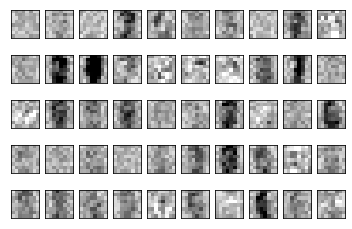

In [14]:
fig, axes = plt.subplots(5,10)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

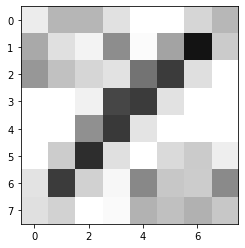

In [15]:
image = mpimg.imread(
    "/home/gasai/github/projects/ml_perseptron/test_percent.png")
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [16]:
image_gray = (16 - image[:, :, 0] * 16).astype(int)
image_gray.shape

(8, 8)

In [18]:
prediction = mlp.predict(image_gray.reshape(1, 64))
print("Это символ - " + str(prediction[0]))

Это символ - %


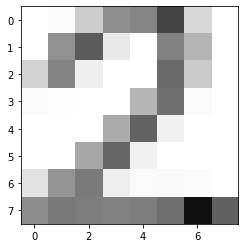

In [19]:
image = mpimg.imread(
    "/home/gasai/github/projects/ml_perseptron/test_2.png")
plt.imshow(image, cmap=plt.get_cmap("gray"))


In [20]:
image_gray = (16 - image[:, :, 0] * 16).astype(int)
prediction = mlp.predict(image_gray.reshape(1, 64))
print("Это символ - " + str(prediction[0]))

Это символ - 2
